Apollo Hospitals - Hypothesis Testing

Problem statement -- >>

What are the parameters that affect the hospitalization of patients and what can be done to reduce the same.

How well some variables like viral load, smoking, Severity Level describe the hospitalization charges of a life insuraance policy holder.

In [1]:
# import libraries 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
from scipy.stats import chi2_contingency



In [2]:
df = pd.read_csv("scaler_apollo_hospitals.csv")

In [3]:
df.shape

(1338, 8)

In [4]:
df.head(7)

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667
5,5,31,female,no,southeast,8.58,0,9392
6,6,46,female,no,southeast,11.15,1,20601


In [5]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [6]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [7]:
# find all the duplicated rows
df[df.duplicated()]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
581,19,male,no,northwest,10.2,0,4099


In [8]:
df[df.duplicated(keep=False)]

,age,sex,smoker,region,viral load,severity level,hospitalization charges
195,19,male,no,northwest,10.2,0,4099
581,19,male,no,northwest,10.2,0,4099


In [9]:
df.drop_duplicates(keep='first' , inplace=True) # dropping duplicates

In [10]:
df.reset_index(inplace=True,drop=True)

Column Profiling

Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex: This is the policy holder's gender, either male or female

Viral Load: Viral load refers to the amount of virus in an infected person's blood

Severity Level: This is an integer indicating how severe the patient is

Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.

Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest

Hospitalization charges: Individual medical costs billed to health insurance


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1337 non-null   int64  
 1   sex                      1337 non-null   object 
 2   smoker                   1337 non-null   object 
 3   region                   1337 non-null   object 
 4   viral load               1337 non-null   float64
 5   severity level           1337 non-null   int64  
 6   hospitalization charges  1337 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.2+ KB


In [12]:
# convert object to categorical
for i in df.select_dtypes(object).columns:
    df[i] = df[i].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1337 non-null   int64   
 1   sex                      1337 non-null   category
 2   smoker                   1337 non-null   category
 3   region                   1337 non-null   category
 4   viral load               1337 non-null   float64 
 5   severity level           1337 non-null   int64   
 6   hospitalization charges  1337 non-null   int64   
dtypes: category(3), float64(1), int64(3)
memory usage: 46.3 KB


In [13]:
df["severity level"].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: severity level, dtype: int64

In [14]:
df.describe()

,age,viral load,severity level,hospitalization charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,10.221249,1.095737,33197.806283
std,14.044333,2.033556,1.205571,30275.900411
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.760000,0.000000,11866.000000
50%,39.000000,10.130000,1.000000,23465.000000
75%,51.000000,11.570000,2.000000,41644.000000
max,64.000000,17.710000,5.000000,159426.000000


C:\Users\mahik\AppData\Local\Temp\ipykernel_8332\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

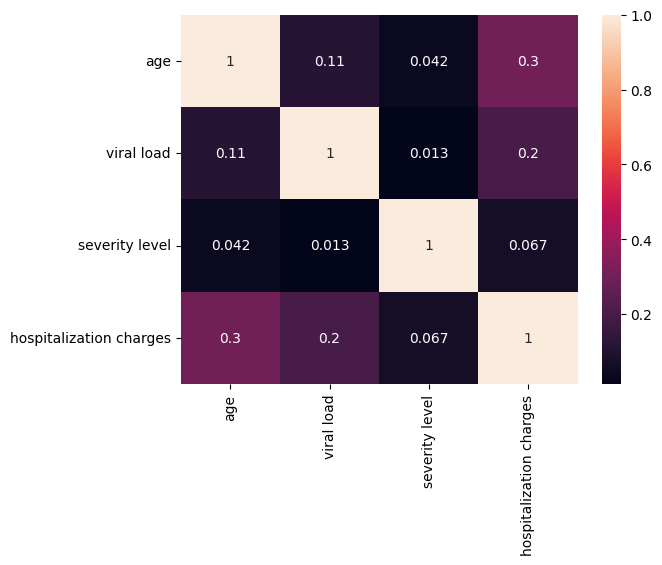

In [15]:
sns.heatmap(df.corr(),annot=True)

None of the columns are correlated with each other

In [16]:
# print max and min age 
print("max_age :",df["age"].max())
print("min_age :",df["age"].min())

max_age : 64
min_age : 18


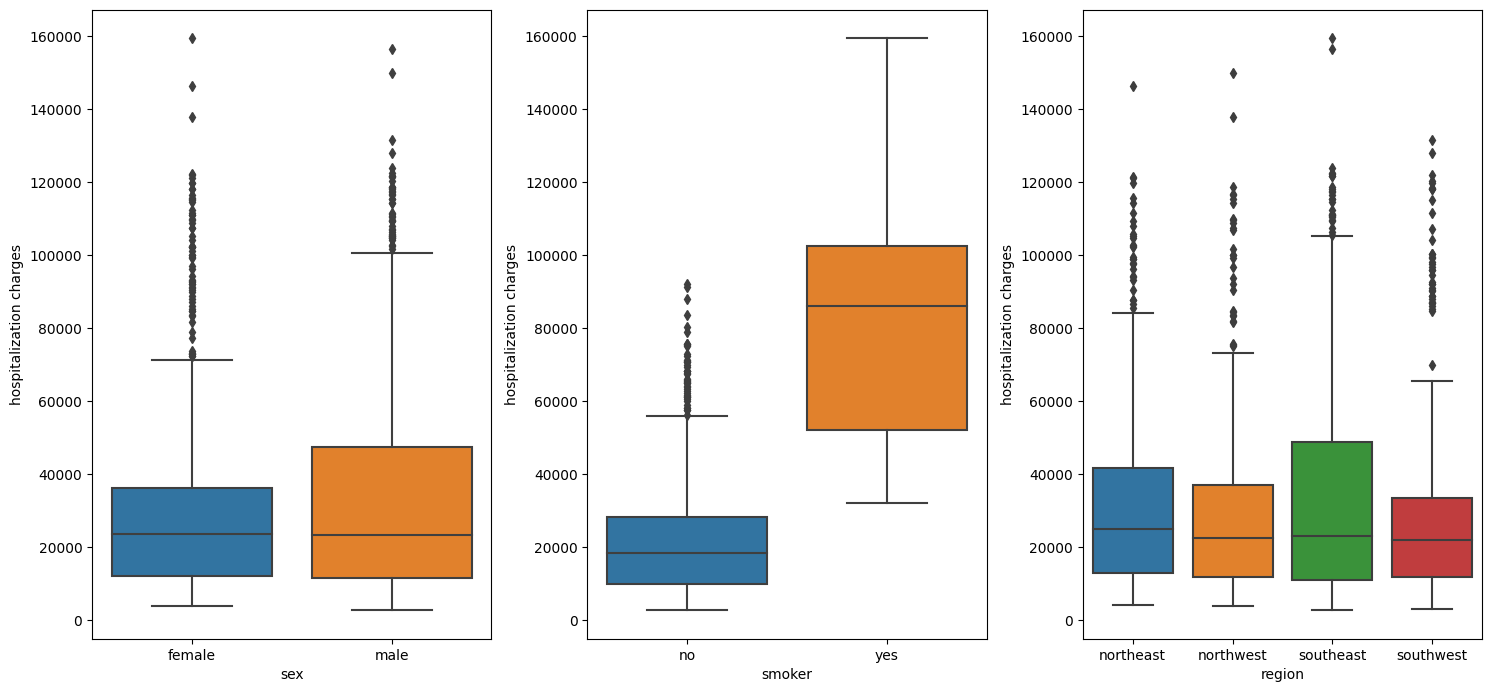

In [17]:
# checking outliers
plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="hospitalization charges")
    plt.tight_layout(pad=1)


In [18]:
df.describe(include="category").T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


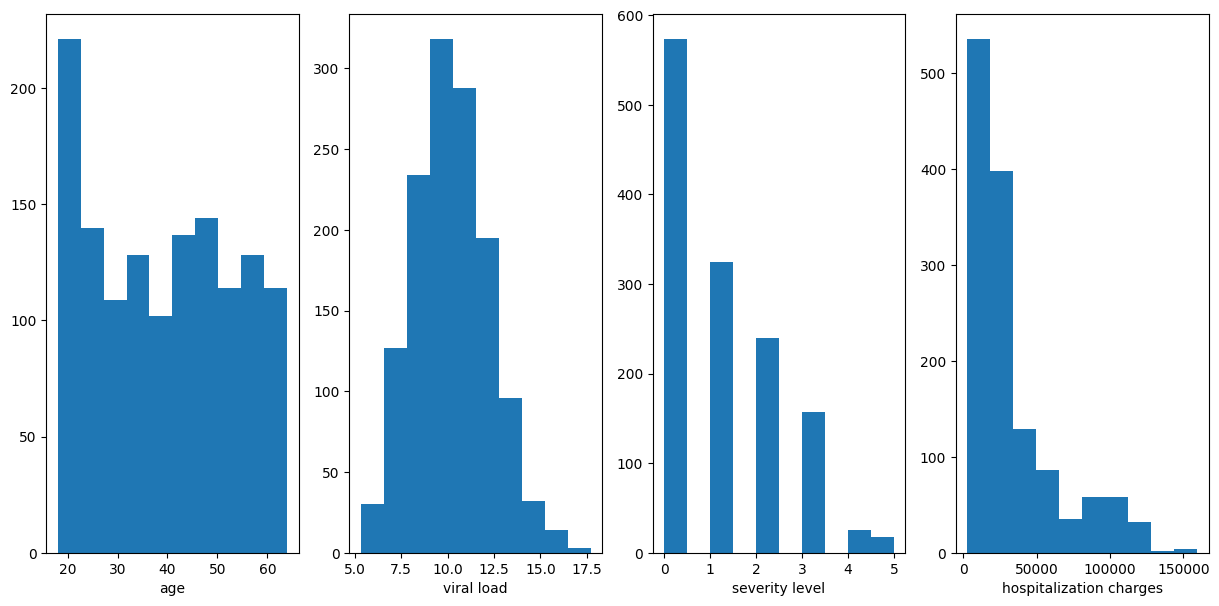

In [19]:
# dist plots
plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes(include=["int64", "float64"]).columns[:4]):
    plt.subplot(1,4,i+1)
    plt.subplots_adjust(hspace=0.8)
    plt.hist(df[j])
    plt.xlabel(j)


We could see form the above that the distribution of hospitalization charges is right skewed and it has outliers when plotted with catogerical columns , let's remove the outliers for the numerical columns

In [20]:
df.select_dtypes(np.number).columns

Index(['age', 'viral load', 'severity level', 'hospitalization charges'], dtype='object')

Outlier- treatment 

In [21]:
for i,j in enumerate(df.select_dtypes(np.number).columns):
    # lower and upper quantiles 
    q1 = df[j].quantile(0.25)
    q3 = df[j].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print(f"{j} : {df[(df[j] < lower_bound) | (df[j] > upper_bound)].shape[0]}")

age : 0
viral load : 9
severity level : 0
hospitalization charges : 139


In [22]:
for i,j in enumerate(df.select_dtypes(np.number).columns):
    # lower and upper quantiles 
    q1 = df[j].quantile(0.25)
    q3 = df[j].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr) 
    # removing outliers
    df = df[(df[j] >= lower_bound) & (df[j] <= upper_bound)]


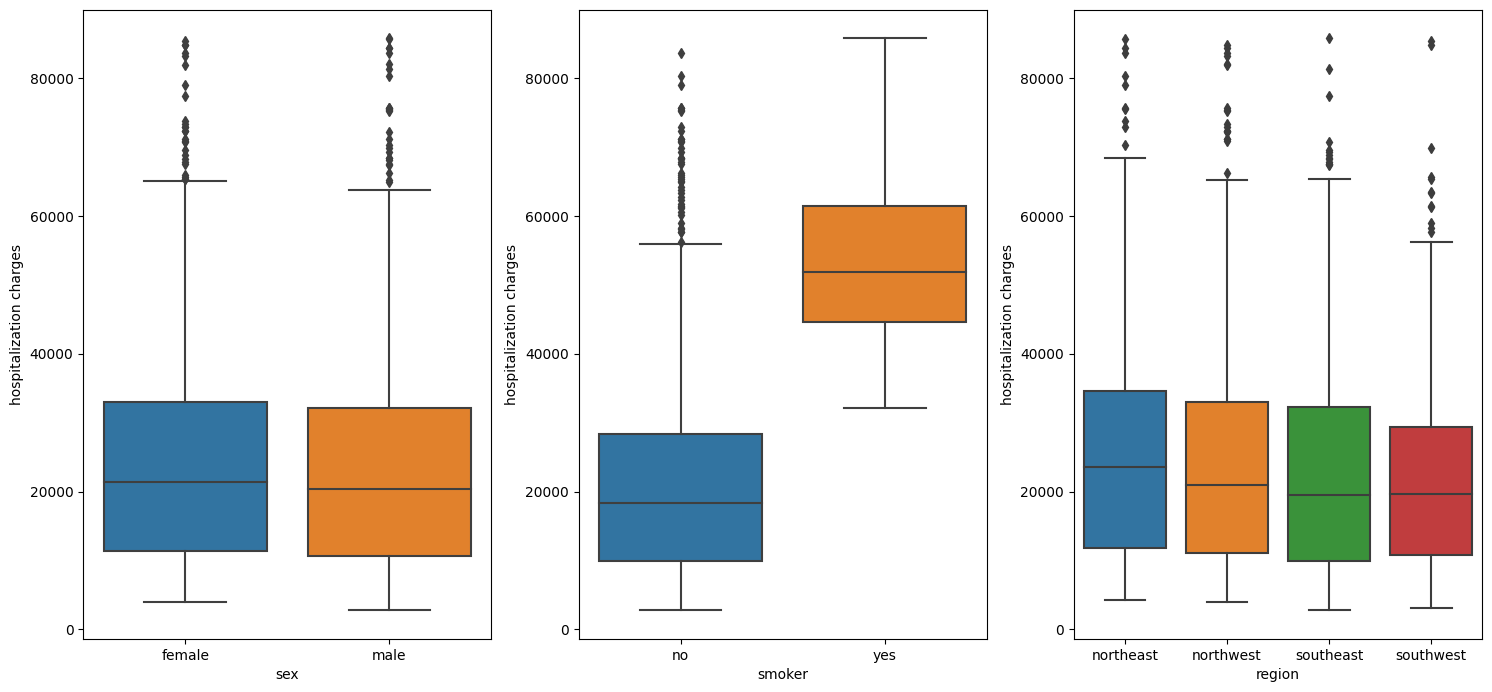

In [23]:

plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="hospitalization charges")
    plt.tight_layout(pad=1)


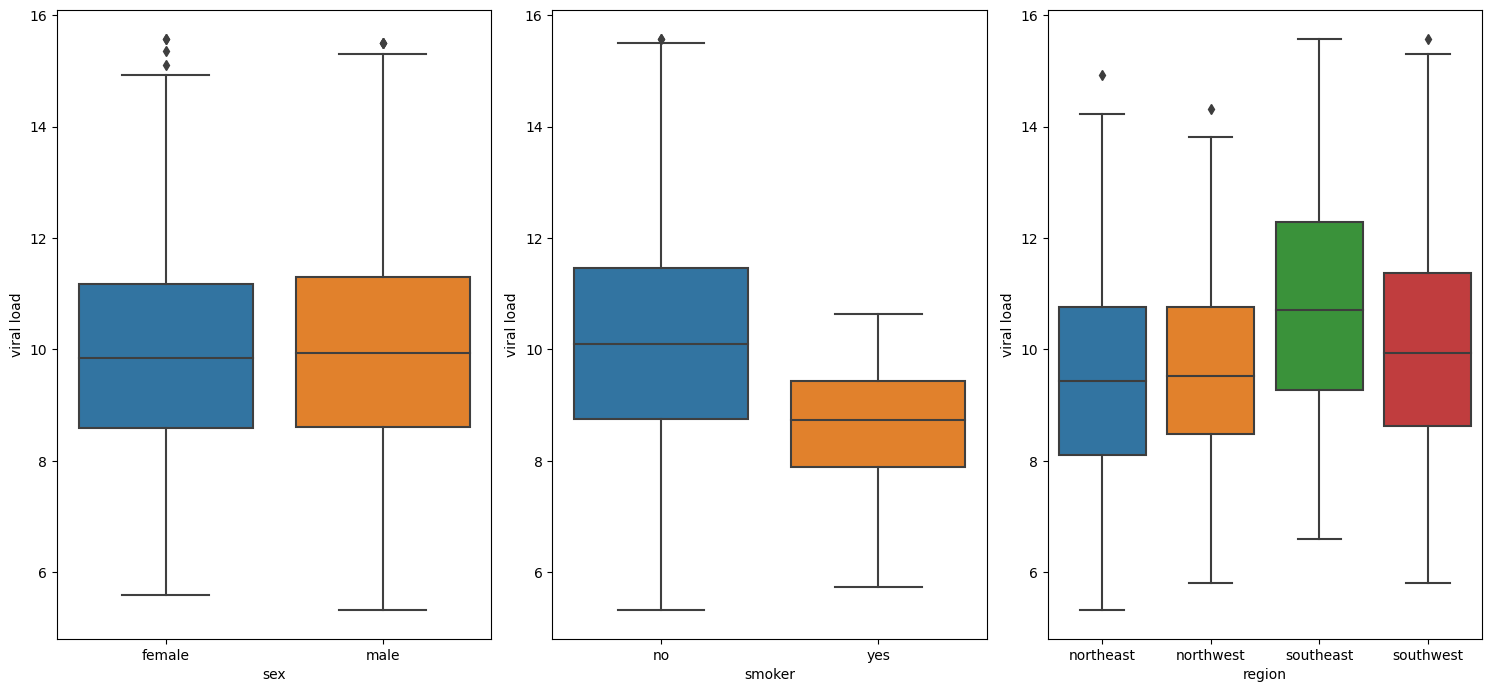

In [24]:
# lets check with viralload and severity and age 

plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="viral load")
    plt.tight_layout(pad=1)


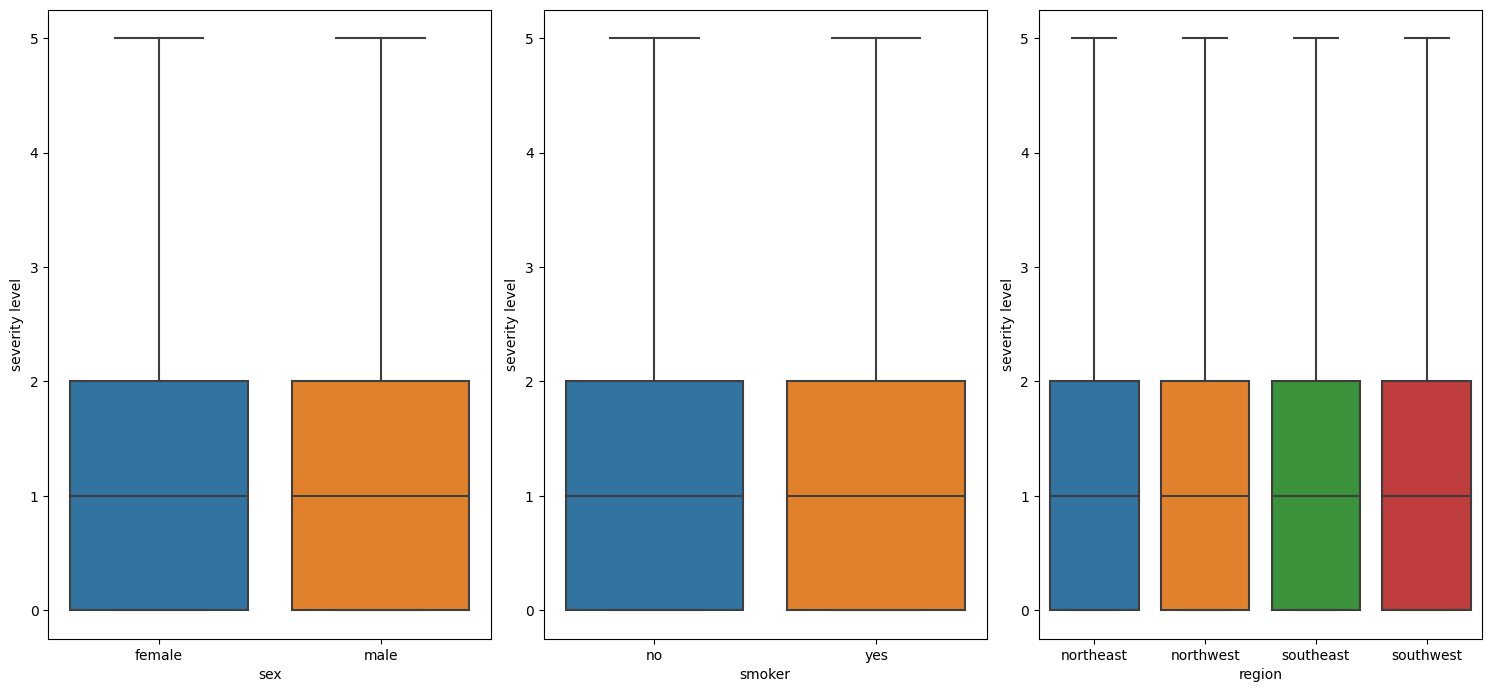

In [25]:
plt.figure(figsize=(15,7))
for i,j in enumerate(df.select_dtypes("category").columns):
    plt.subplot(1,3,i+1) 
    plt.subplots_adjust(hspace=0.8)
    sns.boxplot(data=df,x=j,y="severity level")
    plt.tight_layout(pad=1)


C:\Users\mahik\AppData\Local\Temp\ipykernel_8332\3905190810.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="coolwarm")


<AxesSubplot: >

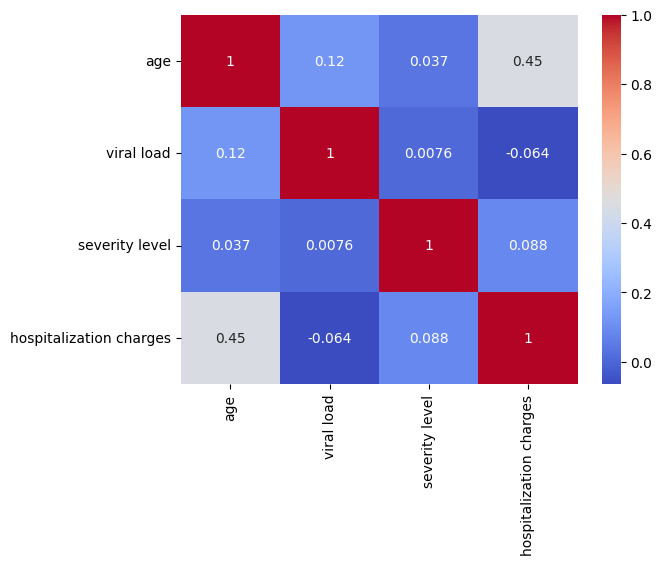

In [26]:
# after removal of outliers let's check the correlation 
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

Now We could observe that age is starting to be correlated with hospitalization charges

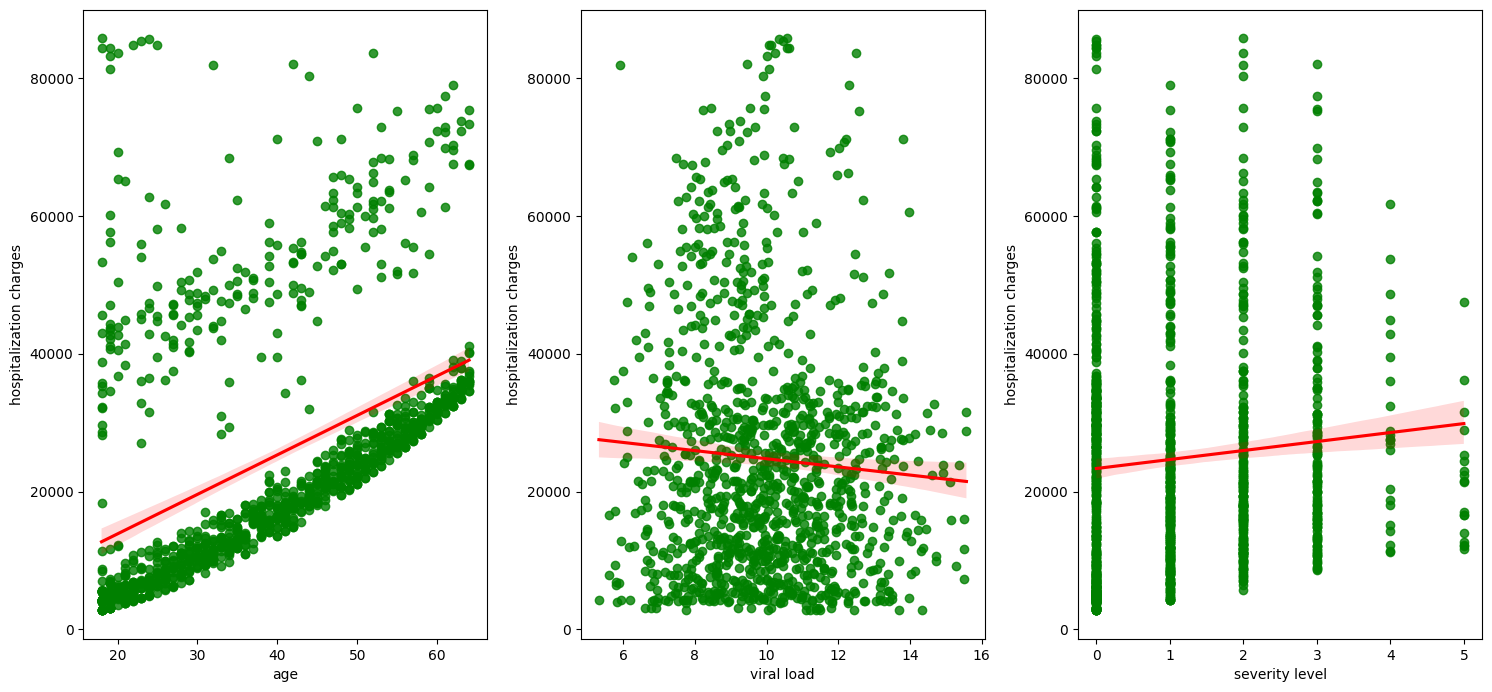

In [27]:
# for col in df.select_dtypes(include=["int64", "float64"]).columns:
#     sns.lmplot(data=df, x=col, y="hospitalization charges", height=5, aspect=0.7)
#     plt.show()

fig, axs = plt.subplots(1, 3, figsize=(15,7))
for i, j in enumerate(df.select_dtypes(np.number).columns[:-1]):
    sns.regplot(data=df, x=j, y="hospitalization charges", ax=axs[i],color="green",line_kws={'color':'red'})
plt.tight_layout(pad=1)
plt.show()

Since Age has slight correlation let's bin the age column and see if it has any effect on hospitalization charges

In [28]:

#  let's bin the age column 
bins = [17,28,38,48,58,68]
labels = ["17-27","28-37","38-47","48-57","58-67"] 
df["age_bin"] = pd.cut(df["age"], bins=bins, labels=labels)

df["age_bin"].value_counts()

17-27    353
48-57    248
38-47    242
28-37    229
58-67    118
Name: age_bin, dtype: int64

<AxesSubplot: xlabel='age_bin', ylabel='hospitalization charges'>

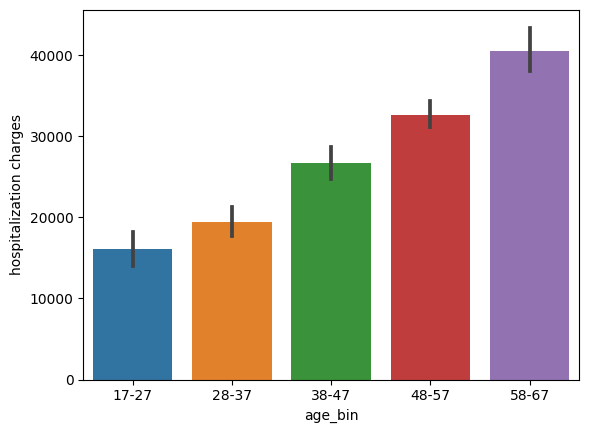

In [29]:
# bar plot for age vs hospitalization charges
sns.barplot(data=df,x="age_bin",y="hospitalization charges")

<AxesSubplot: xlabel='age_bin', ylabel='hospitalization charges'>

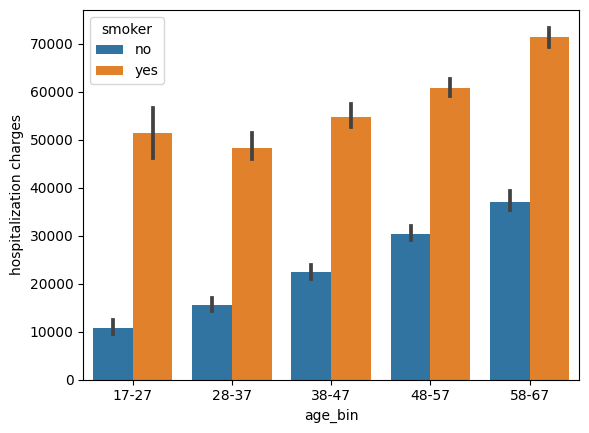

In [30]:
sns.barplot(data=df,x="age_bin",y="hospitalization charges",hue="smoker")

##### from the bar plot we ca assume that as age increases hospitalization charges also increases because generally older patients tned to visit hospitals more and could have more charges and irrespective of age , smokers have higher hospitalization charges

<AxesSubplot: xlabel='sex', ylabel='hospitalization charges'>

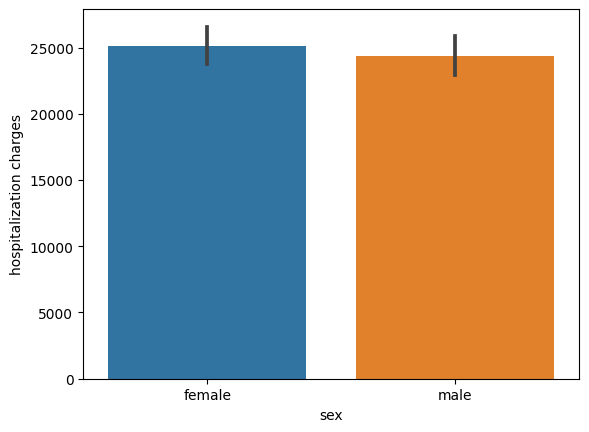

In [31]:
# geneder vs hospitalization charges
sns.barplot(data=df,x="sex",y="hospitalization charges") 

If we observe closely the average hospitalization charges for females are slightly higher than males this might be becuase of child birth (assumption). 
Let's look at smoker distribution

<AxesSubplot: xlabel='sex', ylabel='hospitalization charges'>

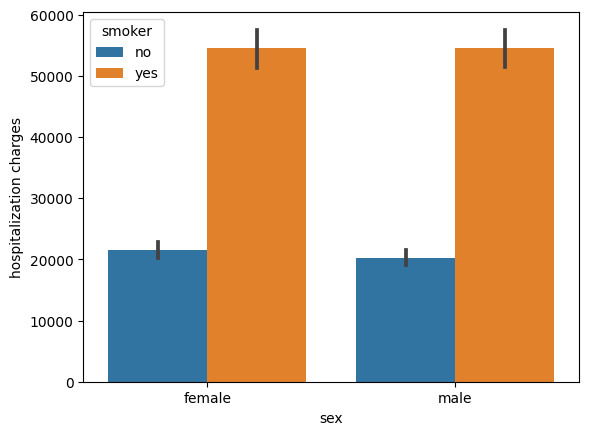

In [32]:
sns.barplot(data=df,x="sex",y="hospitalization charges",hue="smoker")

In [33]:
df["smoker"].value_counts()

no     1054
yes     136
Name: smoker, dtype: int64

<AxesSubplot: xlabel='region', ylabel='count'>

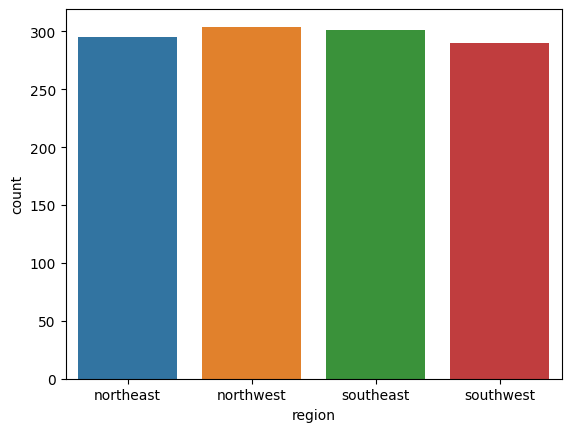

In [34]:
sns.countplot(data=df,x="region")

<AxesSubplot: xlabel='region', ylabel='hospitalization charges'>

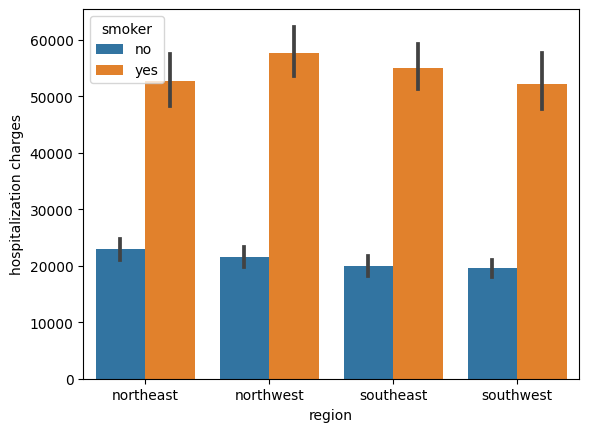

In [35]:
# region vs hospitalization charges
sns.barplot(data=df,x="region",y="hospitalization charges",hue="smoker")

In [36]:
df["severity level"].value_counts()

0    517
1    289
2    205
3    138
4     23
5     18
Name: severity level, dtype: int64

<AxesSubplot: xlabel='severity level', ylabel='count'>

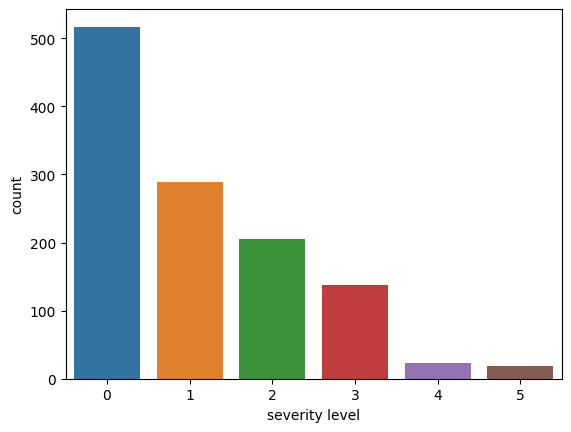

In [37]:
sns.countplot(data=df,x="severity level")

<AxesSubplot: xlabel='severity level', ylabel='count'>

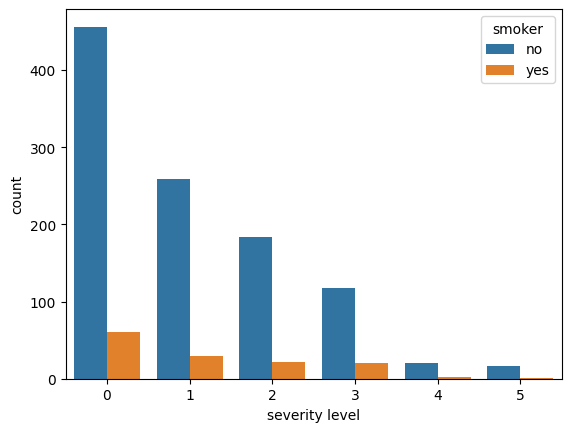

In [38]:
sns.countplot(data=df,x="severity level",hue="smoker")

We can assume that even though as severity level increases the total smoker population decreases however their hospitalization charge still increases.

<AxesSubplot: xlabel='severity level', ylabel='hospitalization charges'>

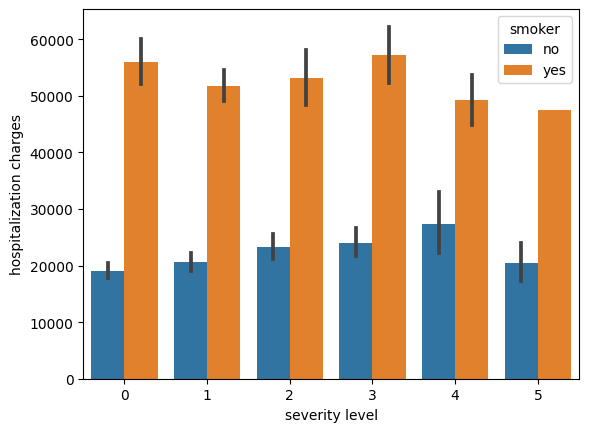

In [39]:
sns.barplot(data=df,x="severity level",y="hospitalization charges",hue="smoker")

<AxesSubplot: xlabel='severity level', ylabel='viral load'>

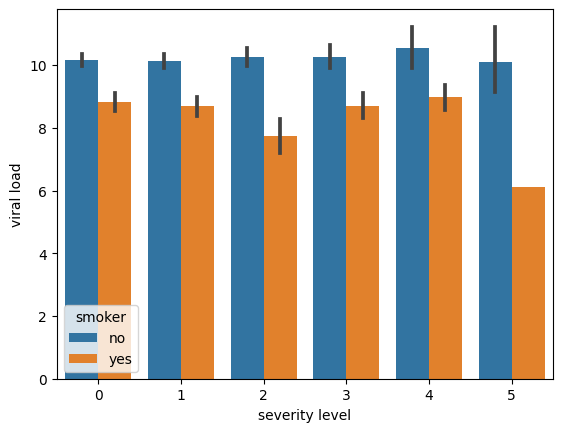

In [40]:
# viral load vs severity level
sns.barplot(data=df,x="severity level",y="viral load",hue="smoker")

In [41]:
# max and min viral load  
print("max_viral_load :",df["viral load"].max())
print("min_viral_load :",df["viral load"].min())

max_viral_load : 15.58
min_viral_load : 5.32


<AxesSubplot: xlabel='severity level', ylabel='count'>

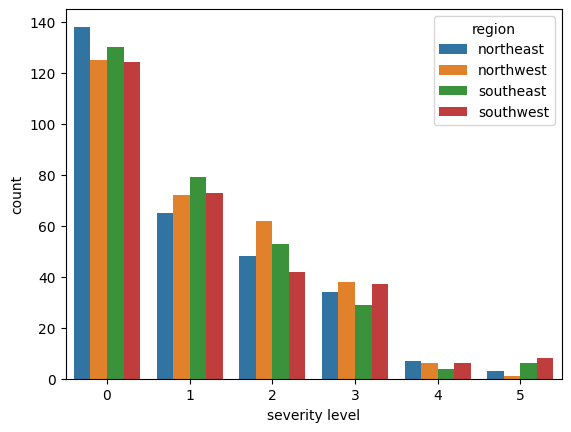

In [42]:
# severity level vs region 
sns.countplot(data=df,x="severity level",hue="region")

<AxesSubplot: xlabel='severity level', ylabel='age'>

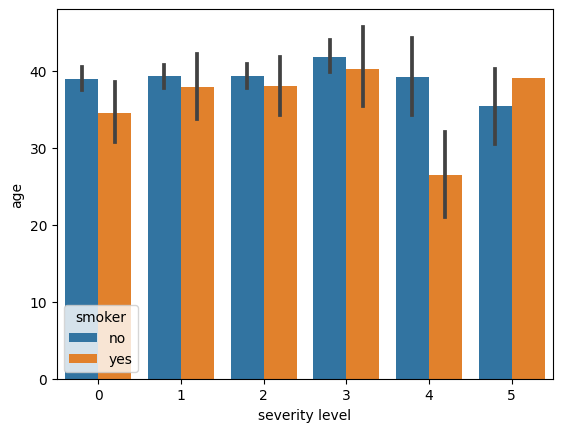

In [43]:
# severity vs age
sns.barplot(data=df,x="severity level",y="age", hue="smoker")

### Hypothesis testing 

1. Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't?

In [44]:
# we saw in our preliminary analysis that smoking affects the hospitalization charges 

df.groupby("smoker")["hospitalization charges"].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1054.0,20923.919355,14560.760875,2805.0,9971.25,18328.5,28389.75,83680.0
yes,136.0,54578.154412,13360.849267,32074.0,44663.50,51899.5,61421.50,85758.0


Even though non -smokers are 7X times smokers , the avg hospitalization charges for smokers is pretty high compared to non-smokers.

H0 : 𝜇1 <= 𝜇2 The avg charges of smokers is less than or equal to Non - smokers 

H1 : 𝜇1 > 𝜇2 The avg charges for smokers is grater than non smokers 

significance level = 0.05  

Population standard devialtion is unknown , and the test is right tailed test -- T test


In [45]:
smoker = df[df["smoker"] == "yes"]["hospitalization charges"].sample(136)
non_smoker = df[df["smoker"] == "no"]["hospitalization charges"].sample(136)

In [46]:
alpha = 0.05 
# t-test 
t_statistic, p_value = stats.ttest_ind(smoker, non_smoker,alternative='greater', equal_var =False)
print("t_statistic : ", t_statistic)
print("p_value : ", p_value ) 
if p_value < alpha:
    print("We reject the null hypothesis and conclude that the hospitalization charges are more for smoker")
else:
    print("We fail to reject the  null hypothesis -- the hospitalization charges are not more for smoker")

t_statistic :  19.889598053933227
p_value :  4.085072066468182e-55
We reject the null hypothesis and conclude that the hospitalization charges are more for smoker


2. Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

In [47]:
df.groupby("sex")["viral load"].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,610.0,9.966541,1.969400,5.60,8.585,9.855,11.1725,15.58
male,580.0,10.030655,1.946617,5.32,8.600,9.935,11.2925,15.51


In [48]:
# count of both genders is almost equal 
male = df[df["sex"] == "male"]["viral load"].sample(580)
female = df[df["sex"] == "female"]["viral load"].sample(580) 

H0 : 𝜇1 = 𝜇2 No difference is viral load for females and males 

H1  : 𝜇1 != 𝜇2 there is differnce in viral load for females and males 

alpha = 0.05  

Population standard deviation is not known and this is a tw0 tailed test

In [49]:
alpha = 0.05 
# t-test
t_statistic, p_value = stats.ttest_ind(male, female,alternative='two-sided') 
print("t_statistic : ", t_statistic)
print("p_value : ", p_value )
if p_value < alpha:
    print("We reject the null hypothesis and conclude that the viral load is different for male and female")
else:
    print("We fail to reject the  null hypothesis -- there is no difference in viral load for male and female")

t_statistic :  0.6235017361370837
p_value :  0.5330776486387168
We fail to reject the  null hypothesis -- there is no difference in viral load for male and female


<AxesSubplot: xlabel='viral load', ylabel='Density'>

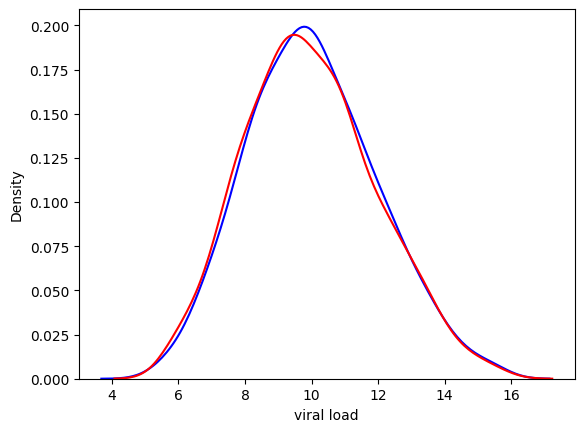

In [57]:
sns.kdeplot(male,label="male",color="blue") 
sns.kdeplot(female,label="female",color="red") 
# they have similar distribution , we also check the same with qqplot

3. Is the proportion of smoking significantly different across different regions?

In [54]:
df.groupby("smoker")["region"].value_counts()

smoker  region   
no      southeast    267
        northwest    266
        southwest    265
        northeast    256
yes     northeast     39
        northwest     38
        southeast     34
        southwest     25
Name: region, dtype: int64

H0 : The proportion of smoker is same in all regions 

H1 : The proportion of smoker is different in atleast one region 

alpha = 0.05 - -chi-squared test

In [55]:
# import chi2_contingency
from scipy.stats import chi2_contingency 

tab = pd.crosstab(df["smoker"],df["region"]) 
tab

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,266,267,265
yes,39,38,34,25


In [63]:
chi2, p_val , dof, expected =  chi2_contingency(tab)

print("chi2 : ", chi2)
print("p_value : ", p_val)
print("dof : ", dof)
print("expected : ")
print(pd.DataFrame((expected), columns= ["northeast","northwest","southeast","southwest"])) 

if p_val < alpha:
    print("We reject the null hypothesis and conclude that the region and smoker are dependent")
else:
    print("We fail to reject the  null hypothesis -- the region and smoker are independent")

chi2 :  3.54438966806284
p_value :  0.31505040099785087
dof :  3
expected : 
    northeast   northwest  southeast   southwest
0  261.285714  269.257143      266.6  256.857143
1   33.714286   34.742857       34.4   33.142857
We fail to reject the  null hypothesis -- the region and smoker are independent


4.  Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? 

H0 : The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is same

H1 : Atleast one of the mean viral load is not same. 

alpha = 0.05 - one way Anova -- more than two groups

In [66]:
women = df[df["sex"] == "female"]

In [74]:
women["severity level"].value_counts()

0    268
1    147
2    106
3     71
4     10
5      8
Name: severity level, dtype: int64

In [96]:
sv_0 = women[women["severity level"] == 0]["viral load"]
sv_1 = women[women["severity level"] == 1]["viral load"] 
sv_2 = women[women["severity level"] == 2]["viral load"]
# groups

In [97]:
summary = pd.concat([sv_0.describe(), sv_1.describe(), sv_2.describe()], axis=1)
print(summary)

       viral load  viral load  viral load
count  268.000000  147.000000  106.000000
mean     9.963209    9.908844    9.945000
std      1.936862    1.918987    2.092305
min      5.760000    5.600000    5.730000
25%      8.607500    8.600000    8.345000
50%      9.695000    9.670000   10.060000
75%     11.130000   11.130000   11.202500
max     14.920000   15.360000   15.570000


Checking assumptions of Anova 

Groups are  normally distributed 

Variance of groups are  equal

<AxesSubplot: xlabel='severity level', ylabel='viral load'>

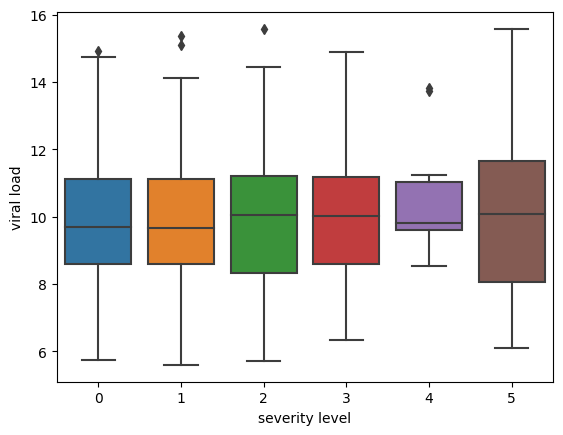

In [87]:
sns.boxplot(data=women, x="severity level", y="viral load")
# consider only 0,1,2 groups

<AxesSubplot: ylabel='Density'>

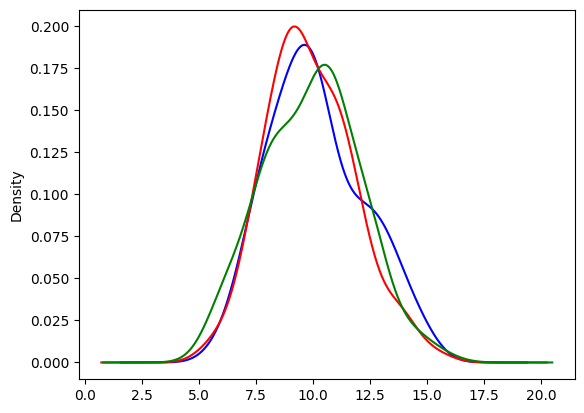

In [111]:
sv_0.sample(106).plot(kind="density", color="blue",label="sv_0")
sv_1.sample(106).plot(kind="density", color="red",label="sv_1")
sv_2.sample(106).plot(kind="density", color="green",label="sv_2")

Shapiro-Wilk test :

H0 : group follows normal distribution

H1 : group does not follow normal distribution

In [110]:
# Normality check 
t0 ,p0 = stats.shapiro(sv_0)
t1 ,p1 = stats.shapiro(sv_1)
t2 ,p2 = stats.shapiro(sv_2)

print("p0 : ", p0)
print("p1 : ", p1)
print("p2 : ", p2)

alpha = 0.05

# if p0 < alpha and p1 < alpha and p2 < alpha:
#     print("Reject the null hypothesis -- one of the groups is not normally distributed")
# else:
#     print("We fail to reject the  null hypothesis -- all the groups are normally distributed")

p0 :  0.009030490182340145
p1 :  0.35928934812545776
p2 :  0.4940856397151947


In [113]:
if  p0 < alpha :
     print("Reject the null hypothesis -- one of the groups is not normally distributed")
else:
    print("We fail to reject the  null hypothesis -- all the groups are normally distributed")

Reject the null hypothesis -- one of the groups is not normally distributed


From the above we could observe that the group 1 doesn't follow normal distribution

Levent test for equal variance : 

H0 : variance is equal for all the groups

H1 : At least for one of the group variance is not equal

In [115]:
# levene test 

from scipy.stats import levene

lv_sat, pval = stats.levene(sv_0,sv_1,sv_2) 

print("pval : ", pval)

alpha = 0.05

if pval < alpha :
     print("Reject the null hypothesis -- variances are not equal for atleast one of the groups")
else:
    print("We fail to reject the  null hypothesis -- variances are equal")

pval :  0.5295170510861678
We fail to reject the  null hypothesis -- variances are equal


Anova :

H0 : The mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level is same

H1 : Atleast one of the mean viral load is not same. 

In [117]:
# let's try anova even if one of the groups is not normally distributed 

from scipy.stats import f_oneway

test_stat, pval = f_oneway(sv_0,sv_1,sv_2) 

print("pval : ", pval)

alpha = 0.05

if pval < alpha :
     print("Reject the null hypothesis -- mean viral loads are not same for atleast one of the groups")
else:
    print("We fail to reject the  null hypothesis -- mean viral loads are same for all the groups")

pval :  0.9642899920667247
We fail to reject the  null hypothesis -- mean viral loads are same for all the groups


### Recommendations to the hospital to share with the patients :

The first question a person was asked when taking a life insurance policy is if the patient is smoker or not. 

We could understand the weight of that question from our analysis 

We observed that irrespective of age , gender that patients who smoke or patients who has higher viral load have more hospitilization charges which leads to more claims.

Viral load is independent of gender.

Need to encourage smokers to quit smoking like provide incentives, rehabilitation, educate them about the effects of smoking.

The only thing the patients can do about the viral load is to build better immunity by exercising , following diet which has nutritional value.

-- By Mahikshith